In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
import pydotplus
import pandas_profiling as pp
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

In [58]:
# Importing dataset
irisdata = pd.read_csv("Iris.csv")
irisdata = irisdata.drop_duplicates()
display(irisdata.head(10))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
pp.ProfileReport(irisdata)

Number of variables,6
Number of observations,150
Total Missing (%),0.0%
Total size in memory,8.2 KiB
Average record size in memory,56.0 B
Numeric,4
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


# <font color=red> Question 1</font>

#### What type of attributes of the data?

In [59]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


#### Test the margin of the data, is it linearly separable?
Yes. See scatter plot below

#### Using a scatter plot, what pattern can you see? Why?
1. Setosa can be easily identified (linearly separable) with either Versicolor and Virginica.
2. Virginica and Versicolor have some overlap (almost linearly separable). Perhaps suggesting non-linear relationhip between attributes in identifying and classifying those two species Iris.
3. petal_length and petal_width are the most useful features to identify various flower types as they are more distinguishably linear seperable according to their correlation with other attributes. If a hyperplane is drawn, they would have the highest margin between the support vectors.

In [60]:
irisdata.drop(labels='Id', axis=1, inplace=True)

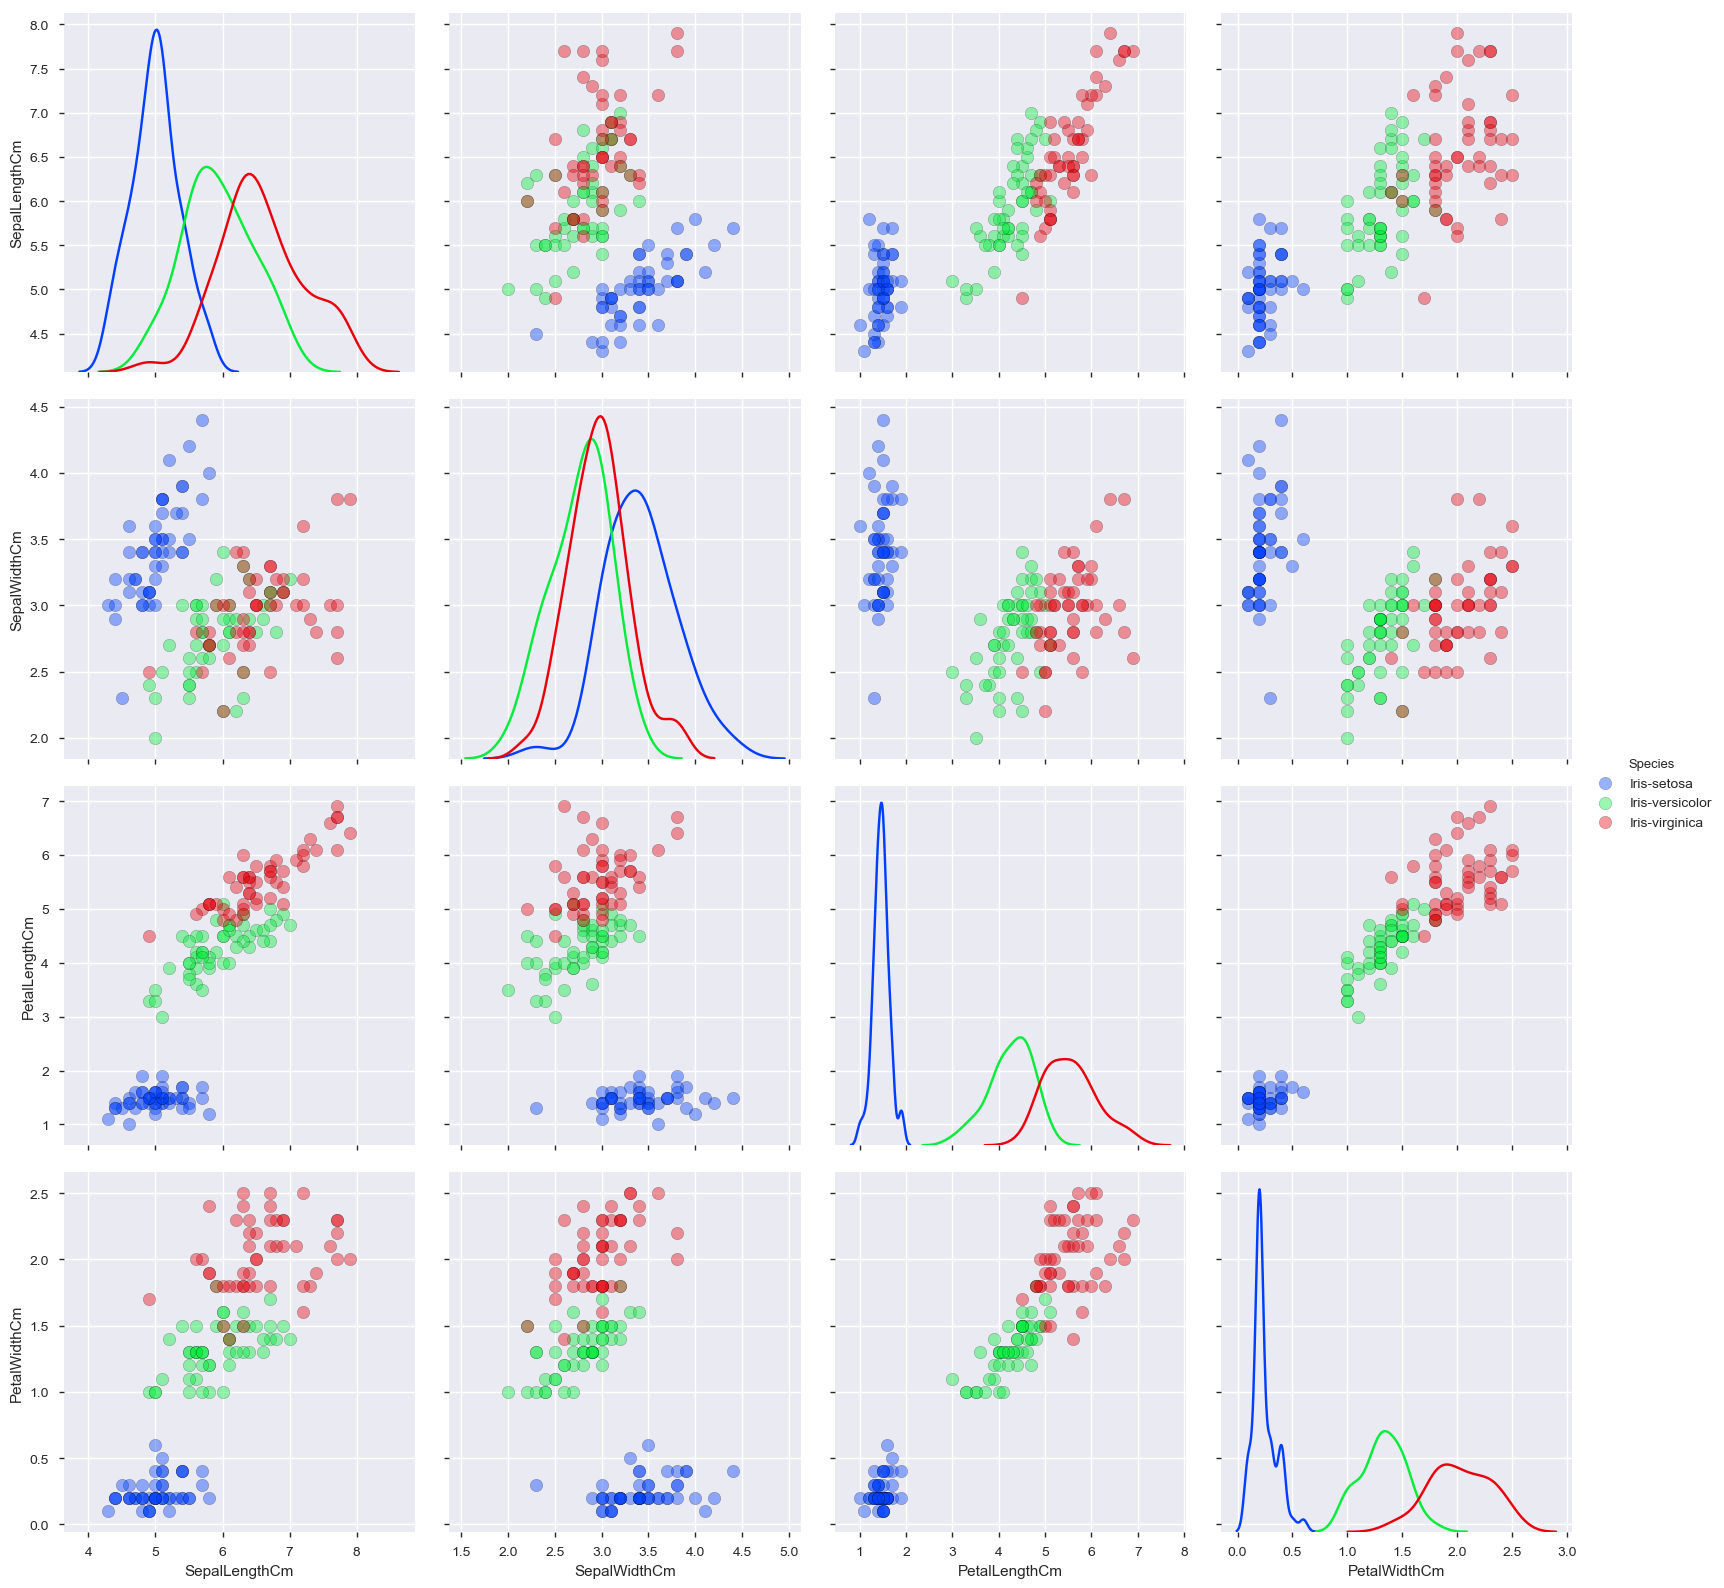

In [61]:
sns.pairplot(irisdata, vars=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'), hue = 'Species', diag_kind = 'kde', plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'}, size = 4, palette="bright")

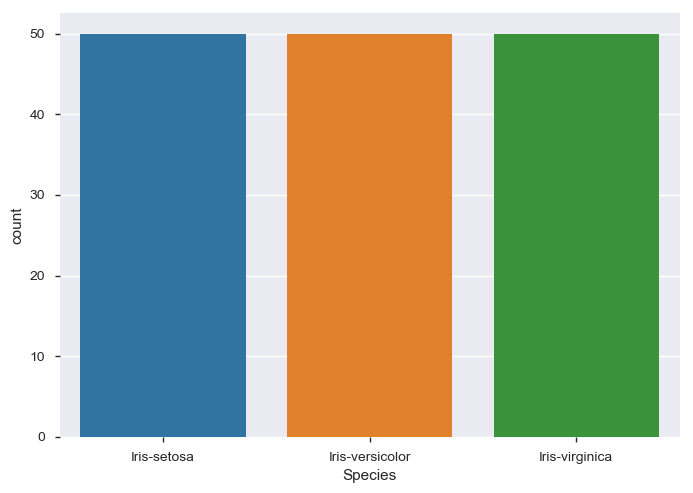

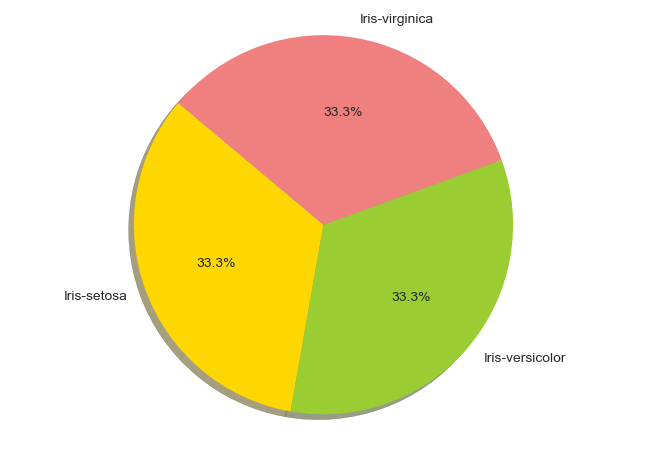

In [50]:
sns.countplot('Species',data=irisdata)
plt.show()

labels = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
sizes = irisdata['Species'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels = labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

# <font color=red> Question 2</font>

#### Experiment with the SVM algorithm introduced in this lab to predict the class of the iris flower data. Use default parameter configurations.

Default kernel is 'rbf' <br>
Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [62]:
x = irisdata.iloc[:,:-1]
y = irisdata.iloc[:,-1:]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
svm = SVC() 
svm.fit(x_train, y_train)
print('Default (rbf) kernel, SVM Accuracy: {:.2f}'.format(svm.score(x_test, y_test)))

Default (rbf) kernel, SVM Accuracy: 0.98


#### Test SVM with at least two other kernels and compare them to the linear kernel. How much they differ?

In [64]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
print('Linear kernel, SVM Accuracy: {:.2f}'.format(svm.score(x_test, y_test)))

Linear kernel, SVM Accuracy: 0.98


In [65]:
svm = SVC(kernel = 'poly')
svm.fit(x_train, y_train)
print('Poly kernel, SVM Accuracy: {:.2f}'.format(svm.score(x_test, y_test)))

Poly kernel, SVM Accuracy: 0.89


In [66]:
svm = SVC(kernel = 'sigmoid')
svm.fit(x_train, y_train)
print('Sigmoid kernel, SVM Accuracy: {:.2f}'.format(svm.score(x_test, y_test)))

Sigmoid kernel, SVM Accuracy: 0.87


#### Then, try to conduct also cross-validation as per the one applied in this lab. Compare the algorithms and specify your findings. Answer the following questions: Do cross-validation effect algorithms' performance?
Yes and the most optimal parameters for Iris dataset classification is error term, C = 100, degree = 1 and kernel = polymonial.

<font color=green>GridSearchCV</font>
<br>Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.
<br>Ref: https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

<font color=green>Polymonial Kernel</font>
<br>A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space. Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
<br>Ref: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

<font color=green>C</font>
<br>C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
<br>Ref: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

<font color=green>Degree</font>
<br>degree : int, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
<br>Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [72]:
kernel_types = ["linear", "poly", "rbf", "sigmoid"]     #types of kernels to be tested
C_range = [0.01, 0.1, 1, 10, 100, 1000]                 #range of C to be tested
degree_range = [1, 2, 3, 4, 5, 6]                       #degrees to be tested

param_grid = {"kernel": kernel_types,
              "C": C_range,
              "degree": degree_range,
              }         #setting grid of parameters

grid = GridSearchCV(estimator = SVC(), 
                    param_grid = param_grid, 
                    cv = 10, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator

svm_model = make_pipeline(preprocessing.StandardScaler(), grid) 
svm_model.fit(x, y)

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9800
{'C': 100, 'degree': 1, 'kernel': 'poly'}


# <font color=red>UNUSED FUNCTIONS. PLEASE IGNORE</font>

In [22]:
# irisdata.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
# plt.xlabel('Statistics',)
# plt.ylabel('Value')
# plt.title("General Statistics of Iris Dataset")

In [ ]:
x = veriler.iloc[:,1:5].values #bağımsız değişkenler
#y = veriler.iloc[:,5:].values #bağımlı değişken


In [ ]:
y = veriler.Species.values
print(x[:5])
print(y[:5])

#verilerin egitim ve test icin bolunmesi
from sklearn.cross_validation import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

